# MAPPING MICROBIOME STUDIES IN MALNOURIHSED AFRICAN POPULATIONS

### Change working directory

In [1]:
import os
#os.chdir('C:\\Users\\Monica\\Dropbox\\Review_mal') 
os.chdir('/Users/monica_mweetwa/Library/CloudStorage/Dropbox/Africa-MetaAnalysis') 

os.getcwd( )

'/Users/monica_mweetwa/Library/CloudStorage/Dropbox/Africa-MetaAnalysis'

### Load the necessary packages

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Import geopandas dataframe with desired coordinates i.e 'naturalearth_lowres' 

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg = 4326) #Set to WGS projection (EPSG:4326)
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [5]:
#Map African Countries Malnutrition Prevelance
# Subset African countries only
Africa = world[world.continent == 'Africa'] 
Africa.rename({"name":"Country"}, axis=1, inplace=True)
Africa.head()

# Import file with metadata for plots
df = pd.read_excel('Tables/AfricaOnly/col_plot.csv')

# Merge metadata with African map dataset
Africa_meta = Africa.merge(df, 'outer') #merges based on Country which is common betwen 2 dataframes
del Africa_meta['pop_est']
del Africa_meta['gdp_md_est']

# verify that the new dataframe is still ageopandas object
Africa_meta.dtypes
geo = gpd.GeoSeries(Africa_meta.set_index('iso_a3')['geometry']).to_json()
Africa_meta = Africa_meta.to_crs(epsg = 4326) #Set to WGS projection (EPSG:4326)
Africa_meta.head()

/var/folders/ln/mxjzytxs21q_df0b1rfl_jb40000gn/T/ipykernel_91409/3459001875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa.rename({"name":"Country"}, axis=1, inplace=True)


continent          Country iso_a3  \
0    Africa         Tanzania    TZA   
1    Africa        W. Sahara    ESH   
2    Africa  Dem. Rep. Congo    COD   
3    Africa          Somalia    SOM   
4    Africa            Kenya    KEN   

                                            geometry  Overweight_prev  \
0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...              4.6   
1  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...              NaN   
2  POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...              3.7   
3  POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...              2.7   
4  POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...              3.8   

   Stunting_prev  
0           30.6  
1            NaN  
2           40.3  
3           18.0  
4           18.4

NameError: name 'inset_axes' is not defined

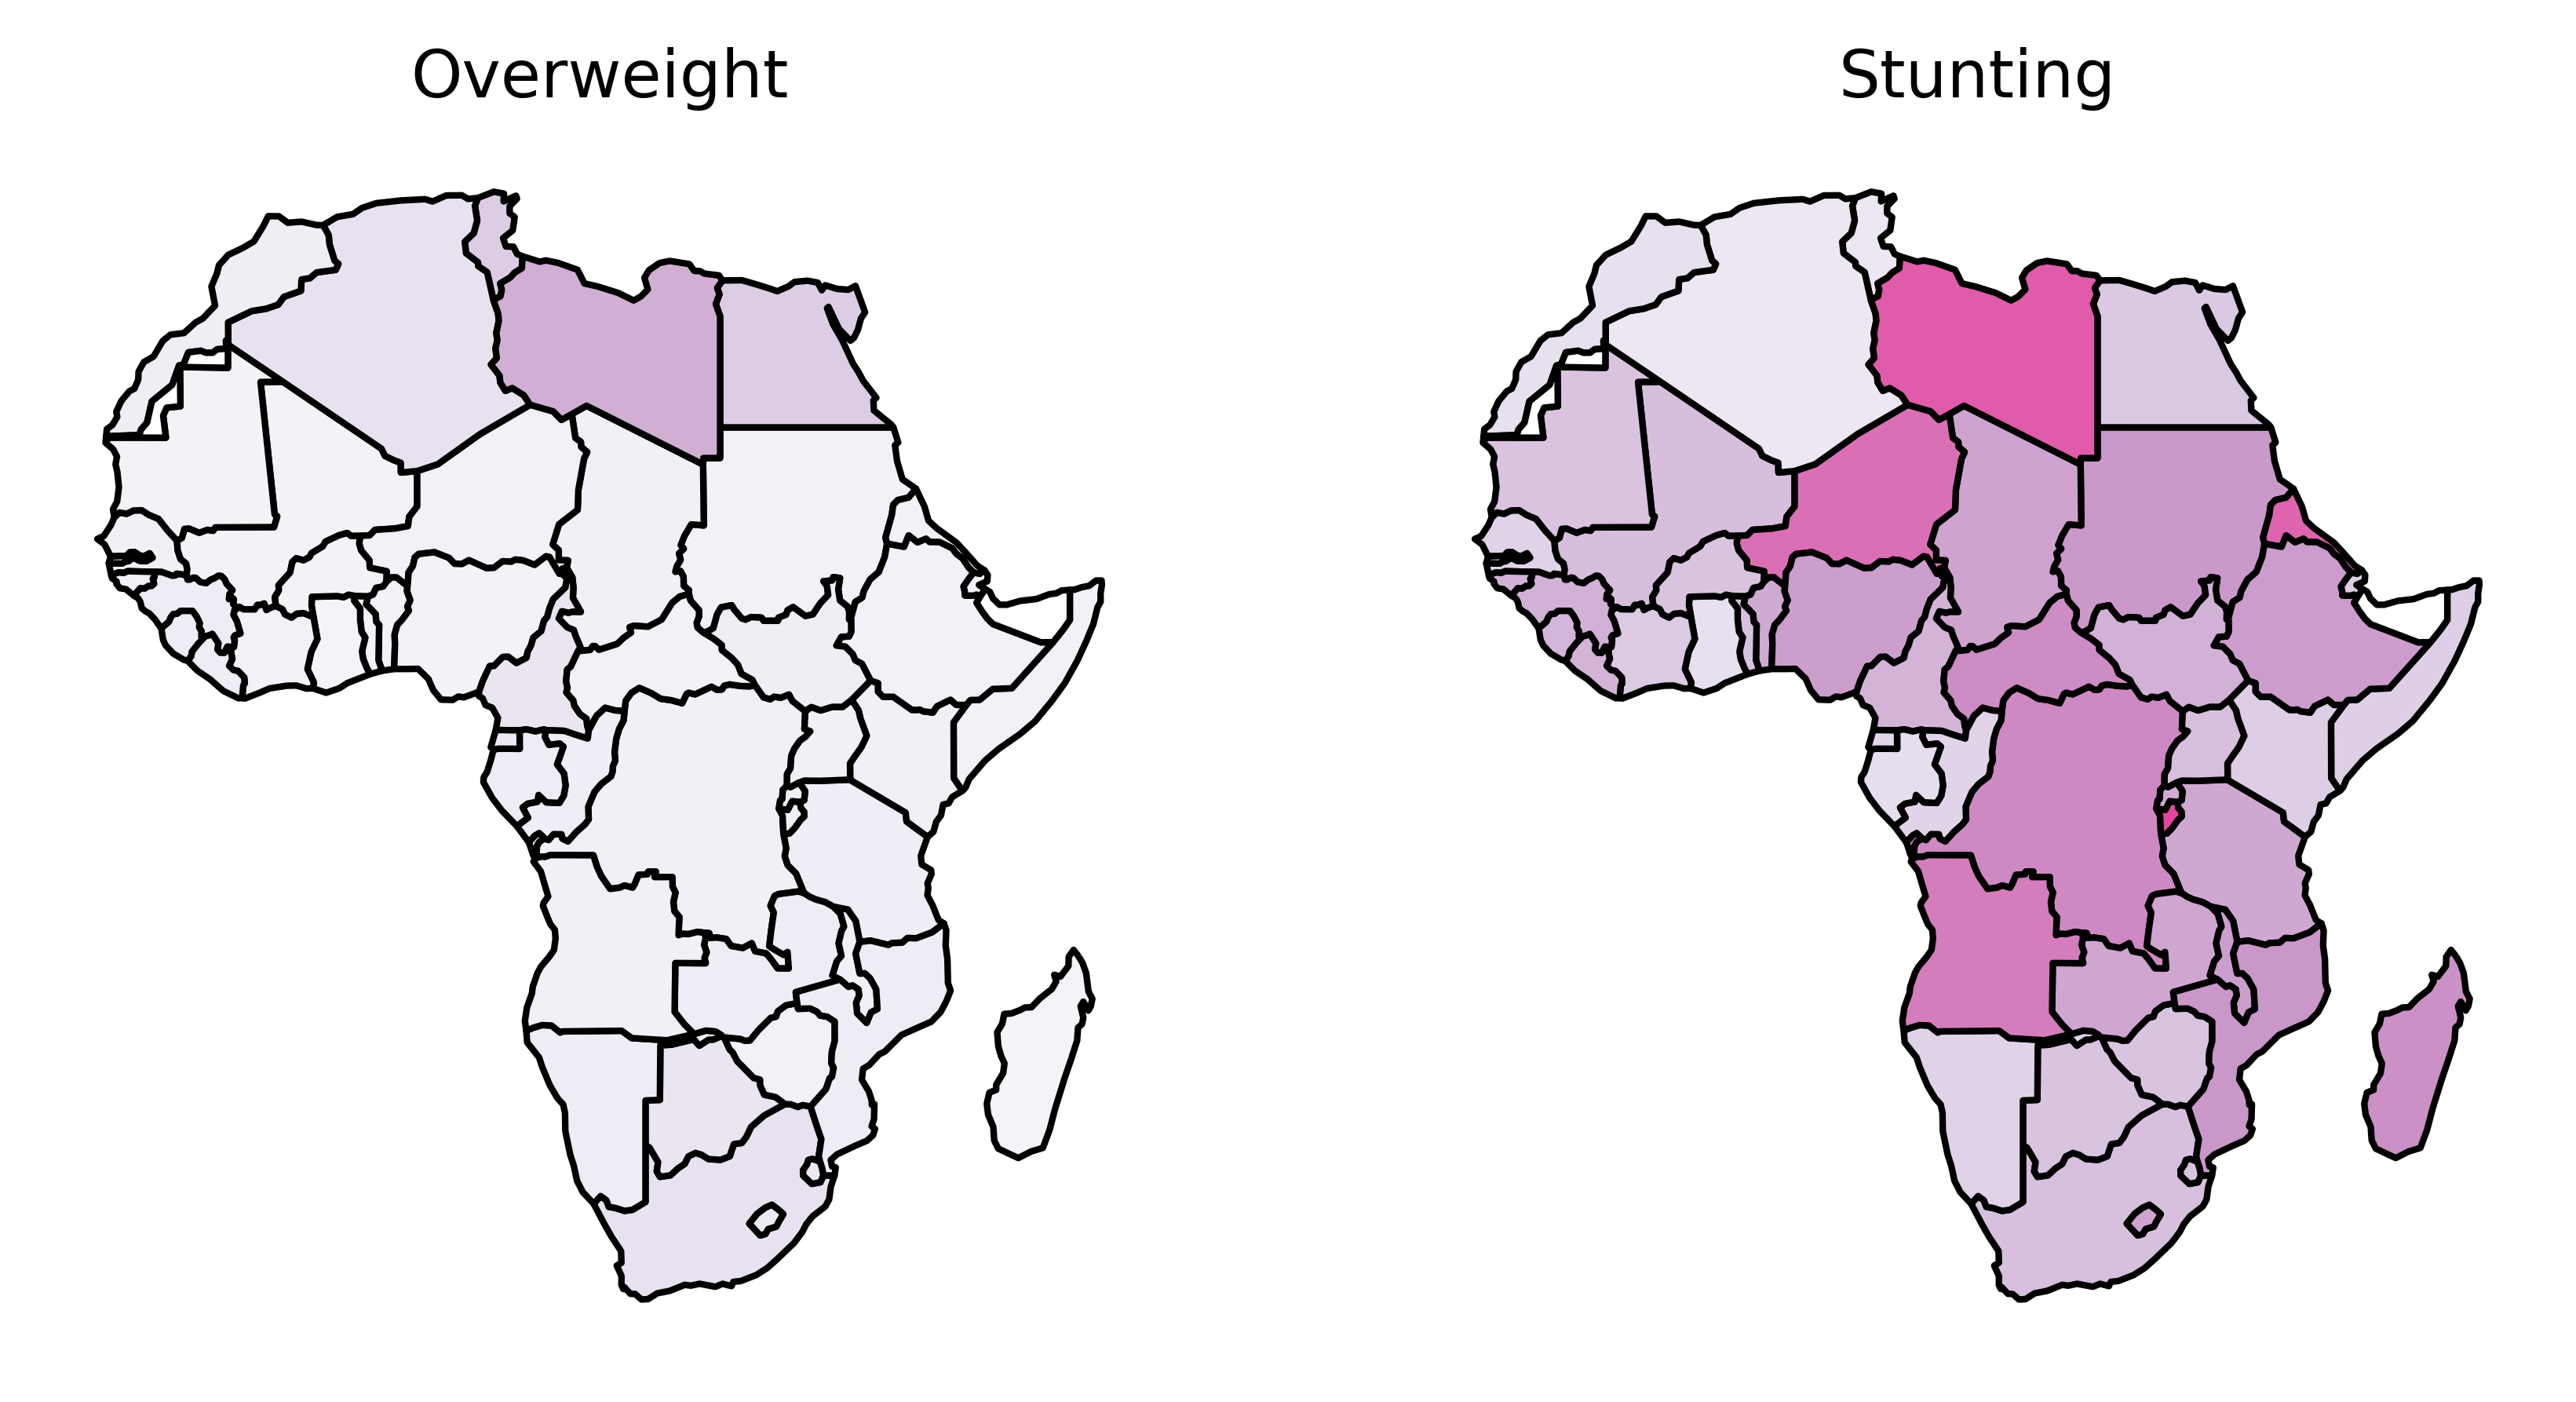

In [6]:
vmin = 0
vmax = 100

figure, axis = plt.subplots(nrows=1,ncols=2, figsize=(6,4), dpi = 600)
figure.tight_layout()

axis[0].set_title('Overweight',fontsize=10)
p1 = Africa_meta.plot(ax=axis[0], column='Overweight_prev', cmap='PuRd',  vmin=vmin, vmax=vmax,edgecolor=u'black',
                 missing_kwds= dict(color = "white"))

axis[1].set_title('Stunting',fontsize=10)
p4 = Africa_meta.plot(ax=axis[1], column='Stunting_prev', cmap='PuRd',  vmin=vmin, vmax=vmax,edgecolor=u'black',
                      missing_kwds= dict(color = "white"))

axis[0].axis('off')
axis[1].axis('off')

# add the colorbar to the figure
sm = plt.cm.ScalarMappable(cmap= 'PuRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([])#paly with the height and borderpad to move legend aroud the plan of the plot
axins = inset_axes(axis[0],
                   width="3%",  
                   height="23%",
                   loc='lower left',
                   borderpad=3)

# Create an inset axis in the bottom right corner
cbar = fig.colorbar(sm,ticks=[0,20,40,60,80,100], 
                    aspect=16, 
                    orientation='vertical',
                    cax=axins)

cbar.ax.tick_params(labelsize=5) 
cbar.ax.set_ylabel('Prevalence',fontsize=5)

plt.show()

disease_fig = figure
#saving our map as .png file.
figure.savefig('Figures/AfricaOnly/Mal-Map-2024_Oct.png', dpi=600, transparent=True)

### Import Metadata and Cleanup tables

In [7]:
# Subset African countries only
Africa = world[world.continent == 'Africa'] 
Africa.rename({"name":"Country"}, axis=1, inplace=True)
Africa.head()

# Import file with metadata for plots
df = pd.read_csv('Tables/AfricaOnly/num_studies2024.csv')

# Merge metadata with African map dataset
Africa_meta = Africa.merge(df, 'outer') #merges based on Country which is common betwen 2 dataframes
del Africa_meta['pop_est']
del Africa_meta['gdp_md_est']

# verify that the new dataframe is still ageopandas object
Africa_meta.dtypes
geo = gpd.GeoSeries(Africa_meta.set_index('Country')['geometry']).to_json()
Africa_meta = Africa_meta.to_crs(epsg = 4326) #Set to WGS projection (EPSG:4326)
Africa_meta.head()

/var/folders/ln/mxjzytxs21q_df0b1rfl_jb40000gn/T/ipykernel_91409/2362815188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa.rename({"name":"Country"}, axis=1, inplace=True)


continent          Country iso_a3  \
0    Africa         Tanzania    TZA   
1    Africa        W. Sahara    ESH   
2    Africa  Dem. Rep. Congo    COD   
3    Africa          Somalia    SOM   
4    Africa            Kenya    KEN   

                                            geometry  studies  SAM  Stunting  \
0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...      NaN  NaN       NaN   
1  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...      NaN  NaN       NaN   
2  POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...      NaN  NaN       NaN   
3  POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...      NaN  NaN       NaN   
4  POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...      NaN  NaN       NaN   

   EE  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN

Get maximum and minimum values to have color gradient on same scale for all maps.

In [8]:
print(Africa_meta[['studies', 'SAM', 'Stunting']].agg(['min','max']))
# These will be the boundaries for the color scale

     studies  SAM  Stunting
min      1.0  1.0       1.0
max      3.0  3.0       3.0


### Plot African map and color countries with microbiome data

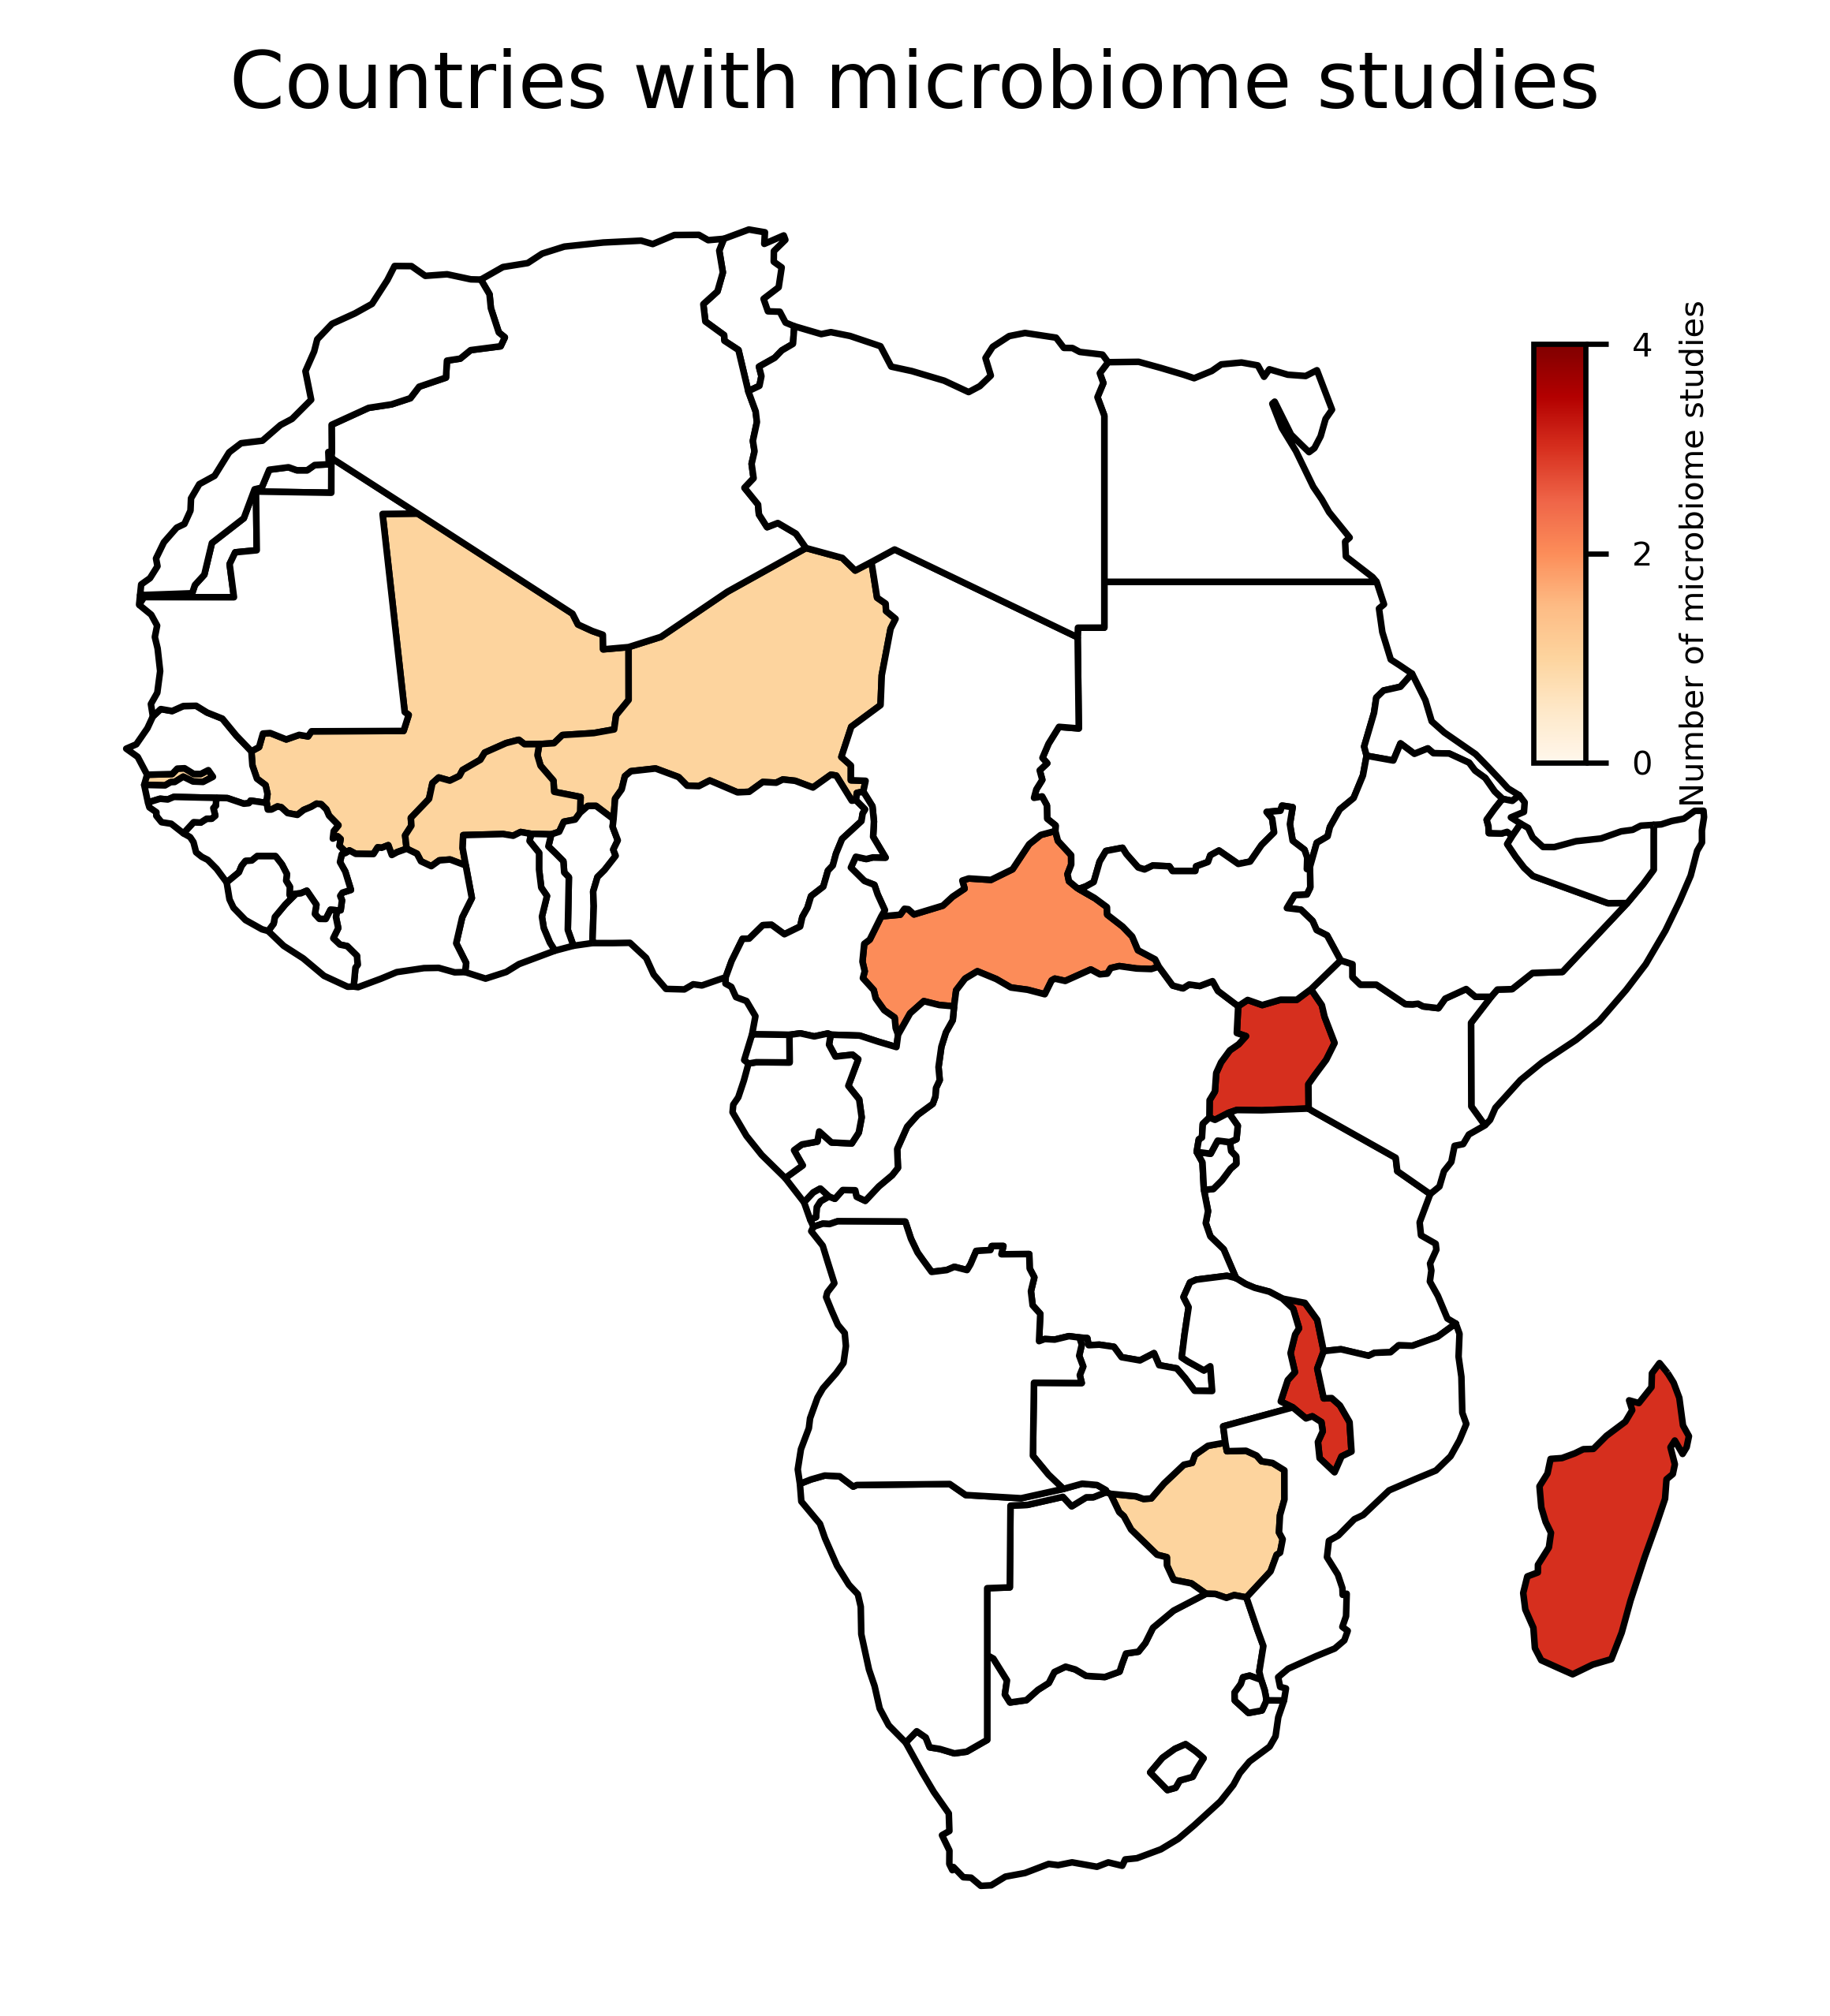

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

vmin = 0
vmax = 4

fig, ax = plt.subplots(1, figsize=(5,5), dpi = 600)

ax.set_title('Countries with microbiome studies')
p0 = Africa_meta.plot(ax=ax, column='studies', cmap='OrRd', #scheme = levels,#, #levels = levels
                 vmin=vmin, vmax=vmax, edgecolor=u'black',
                 missing_kwds= dict(color = "white"))
                 #legend=True,
                 #legend_kwds={'label': "Number of microbiome studies by country",
                  #            'location': 'right'})

sm = plt.cm.ScalarMappable(cmap= 'OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([])
# add the colorbar to the figure
#paly with the height and borderpad to move legend aroud the plan of the plot
axins = inset_axes(ax,
                   width="3%",  
                   height="23%",
                   loc='upper right',
                   borderpad=3)

# Create an inset axis in the bottom right corner
cbar = fig.colorbar(sm,ticks=[0,2,4,6], 
                    aspect=16, 
                    orientation='vertical',
                    cax=axins)

cbar.ax.tick_params(labelsize=5) 
cbar.ax.set_ylabel('Number of microbiome studies',fontsize=5)

ax.set_axis_off()
#saving our map as .png file.
fig.savefig('Figures/AfricaOnly/Full_Map_2024_Oct.png', dpi=600, bbox_inches='tight', transparent=True)


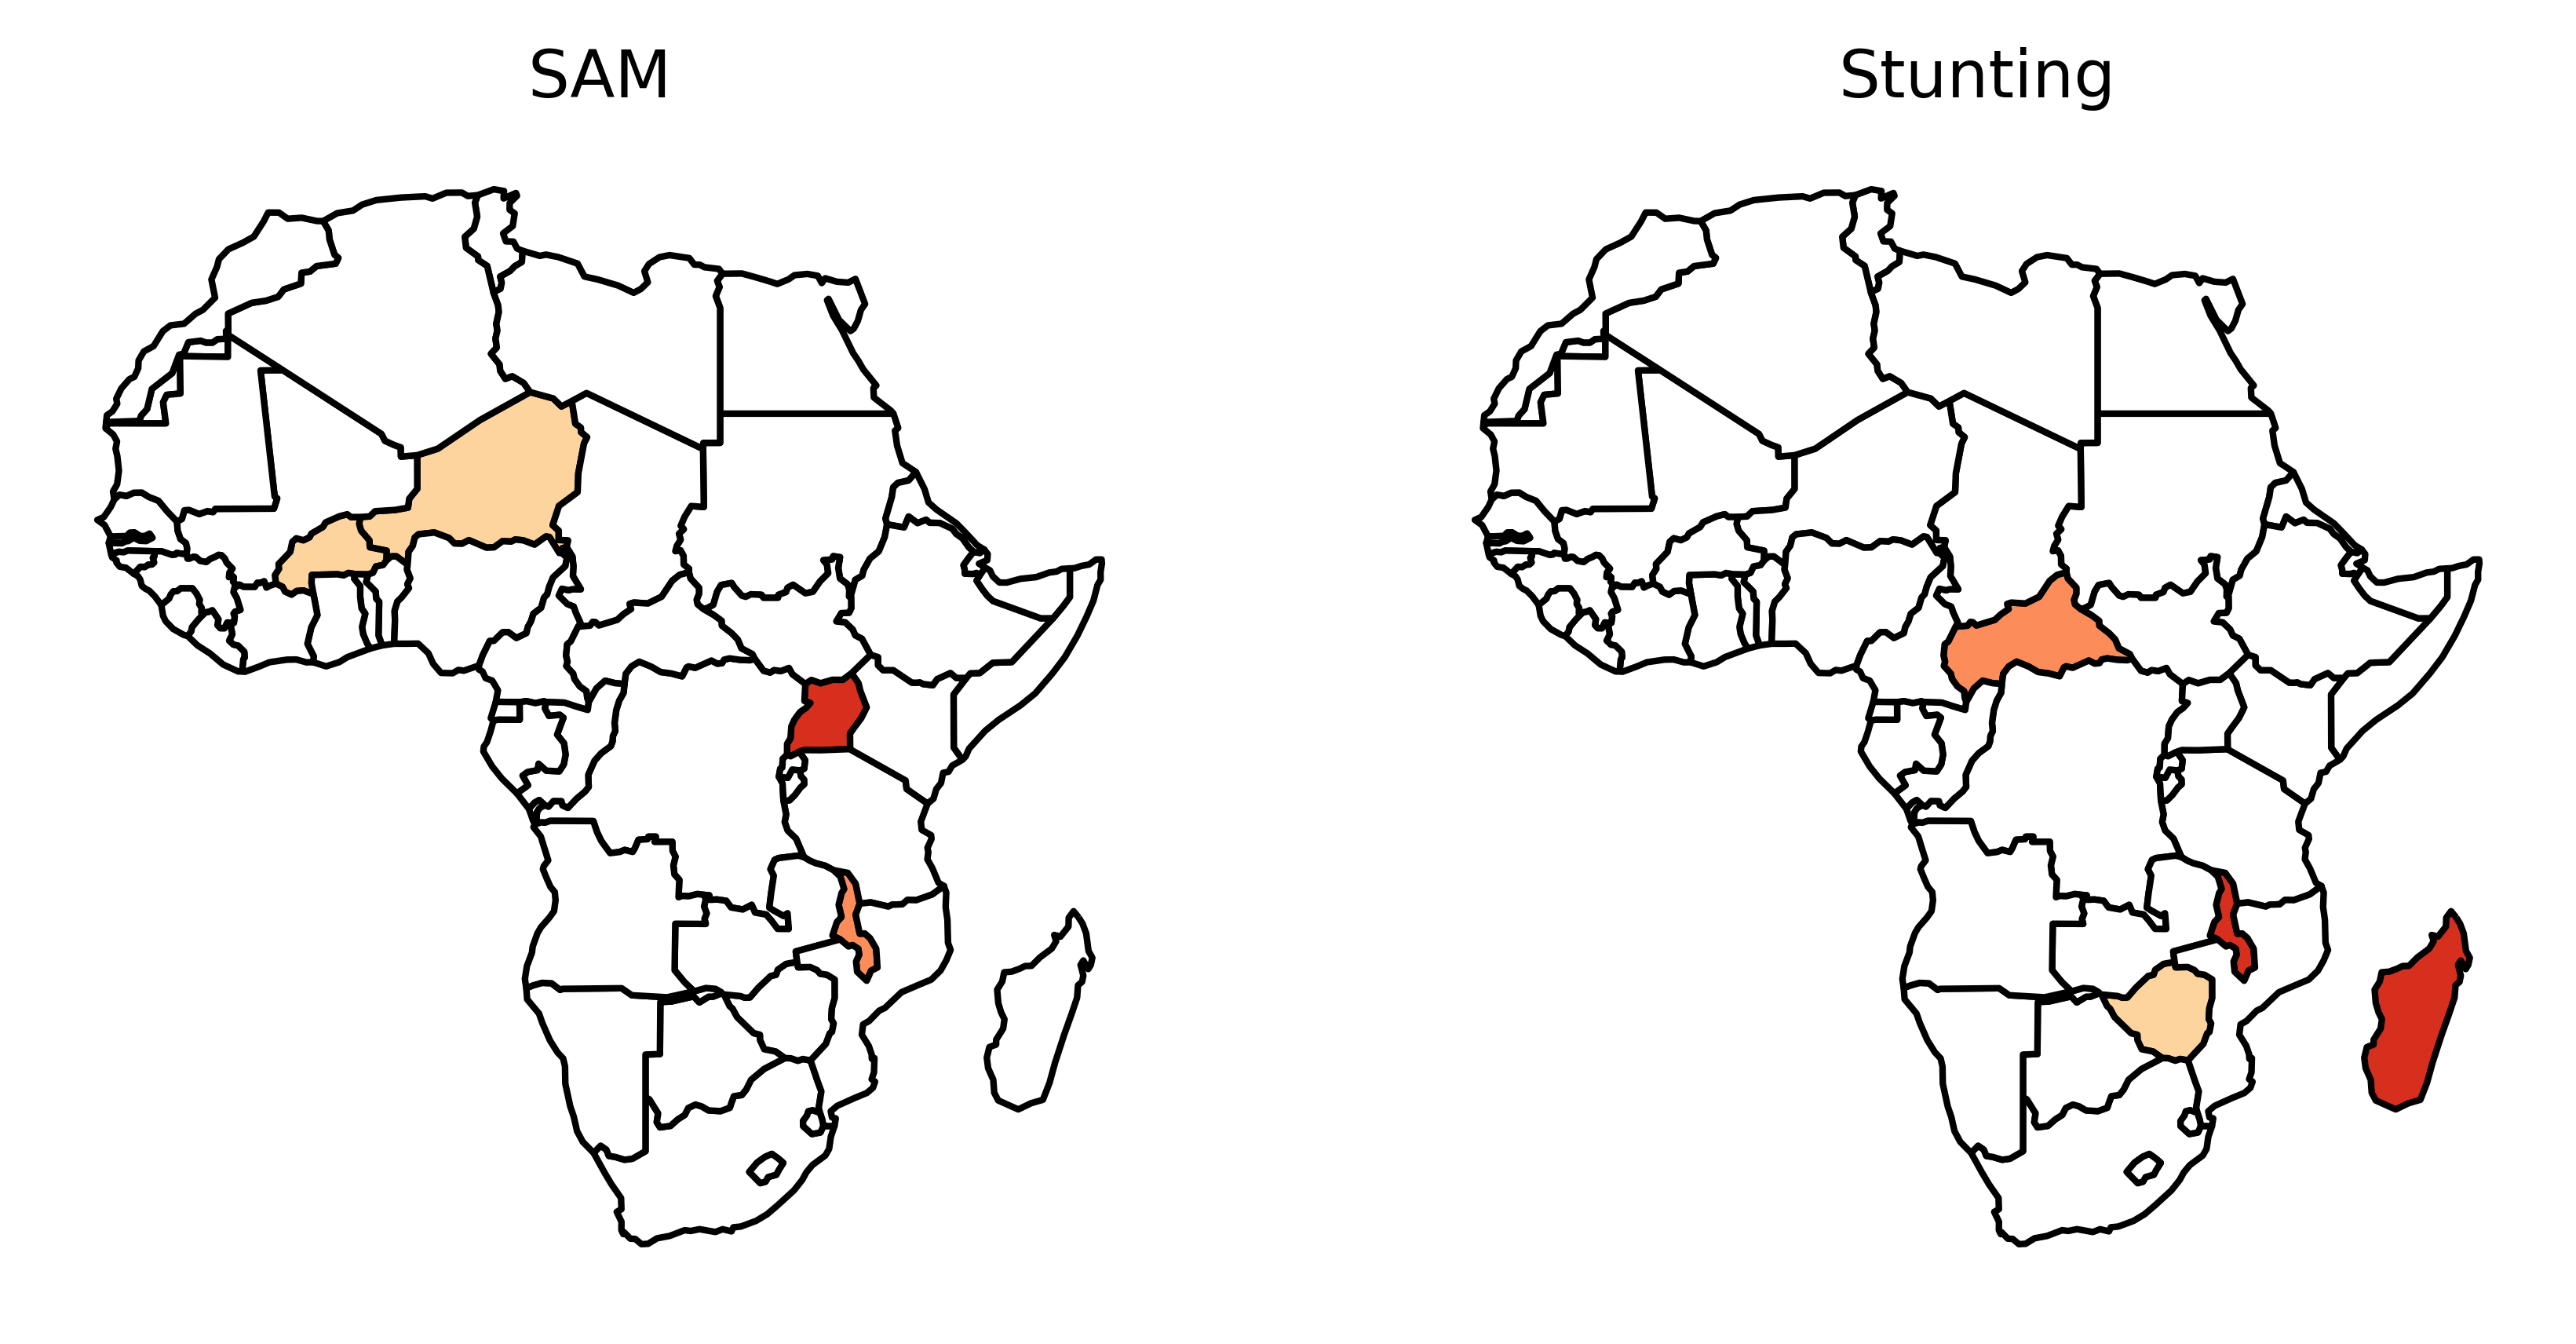

In [11]:
vmin = 0
vmax = 4

figure, axis = plt.subplots(nrows=1,ncols=2, figsize=(6,4), dpi = 600)
figure.tight_layout()

axis[0].set_title('SAM',fontsize=10)
p1 = Africa_meta.plot(ax=axis[0], column='SAM', cmap='OrRd',  vmin=vmin, vmax=vmax,edgecolor=u'black',
                 missing_kwds= dict(color = "white"))

axis[1].set_title('Stunting',fontsize=10)
p4 = Africa_meta.plot(ax=axis[1], column='Stunting', cmap='OrRd',  vmin=vmin, vmax=vmax,edgecolor=u'black',
                      missing_kwds= dict(color = "white"))

#axis[2].set_title('Obesity',fontsize=10)
#p4 = Africa_meta.plot(ax=axis[2], column='Obesity', cmap='OrRd',  vmin=vmin, vmax=vmax,edgecolor=u'black',
                     # missing_kwds= dict(color = "white"))


axis[0].axis('off')
axis[1].axis('off')
#axis[2].axis('off')
plt.show()

disease_fig = figure
#saving our map as .png file.
figure.savefig('Figures/AfricaOnly/Disease-Map-2024_Oct.png', dpi=600)

## Make pie charts/ barchart illustrating other features of studies


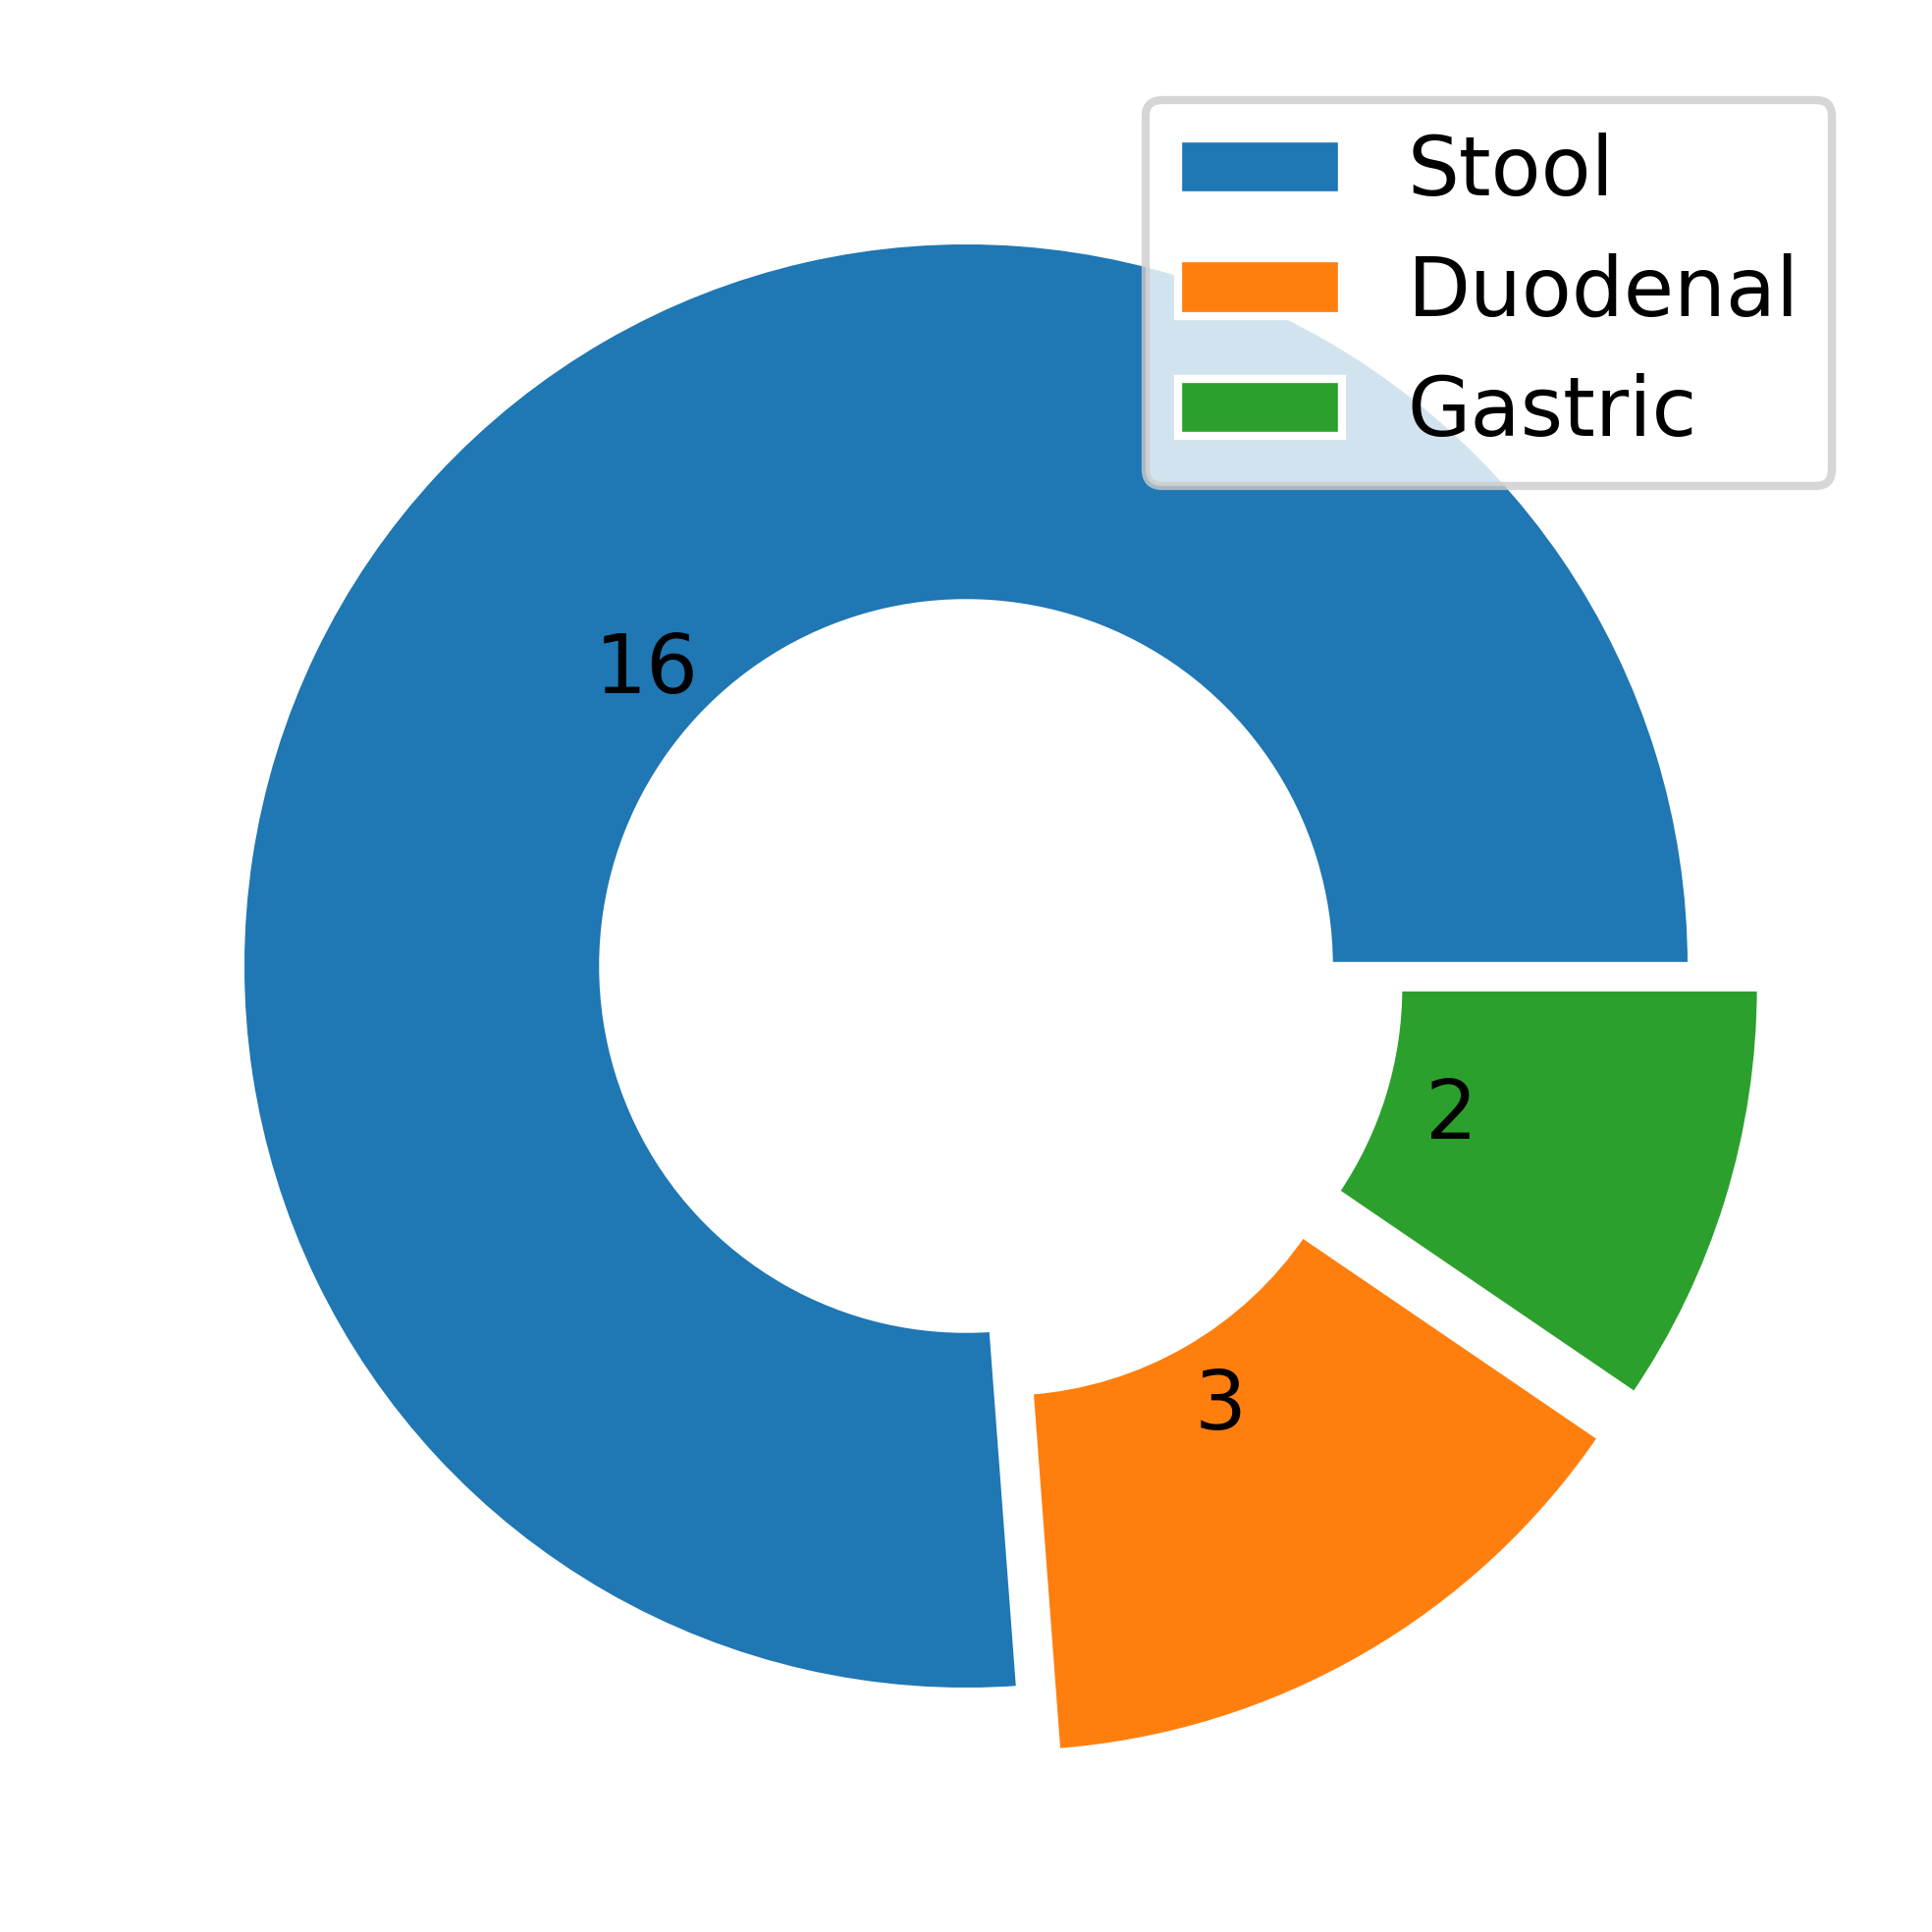

In [12]:
##import file with sample types for each year and overall
sampletype = pd.read_csv('Tables/AfricaOnly/sample_types2024.csv')
#df = df.fillna(0)
#df.replace(0, np.nan, inplace=True)
sampletype.head()

#explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig = plt.subplots( figsize=(4,4), dpi = 600)

sizes = np.array([16, 2, 3])
#add function to plot absolute values of each pie
def absolute_value(val):
    a  = sizes[ np.abs(sizes - val/100.*sizes.sum()).argmin() ]
    return a

plt.pie(sampletype['Count'], labels =None, autopct=absolute_value, radius=1.0,
        wedgeprops=dict(width=0.5, edgecolor='w'), explode=[0,0.1,0.1])

plt.legend(labels = sampletype['Sample Type'], loc="upper right")

#plt.title('Samples used as proxy for gut microbiome', color='black')
plt.savefig('Figures/AfricaOnly/ProxySample_Absolute_Oct.png', dpi=600, bbox_inches='tight', transparent=True)


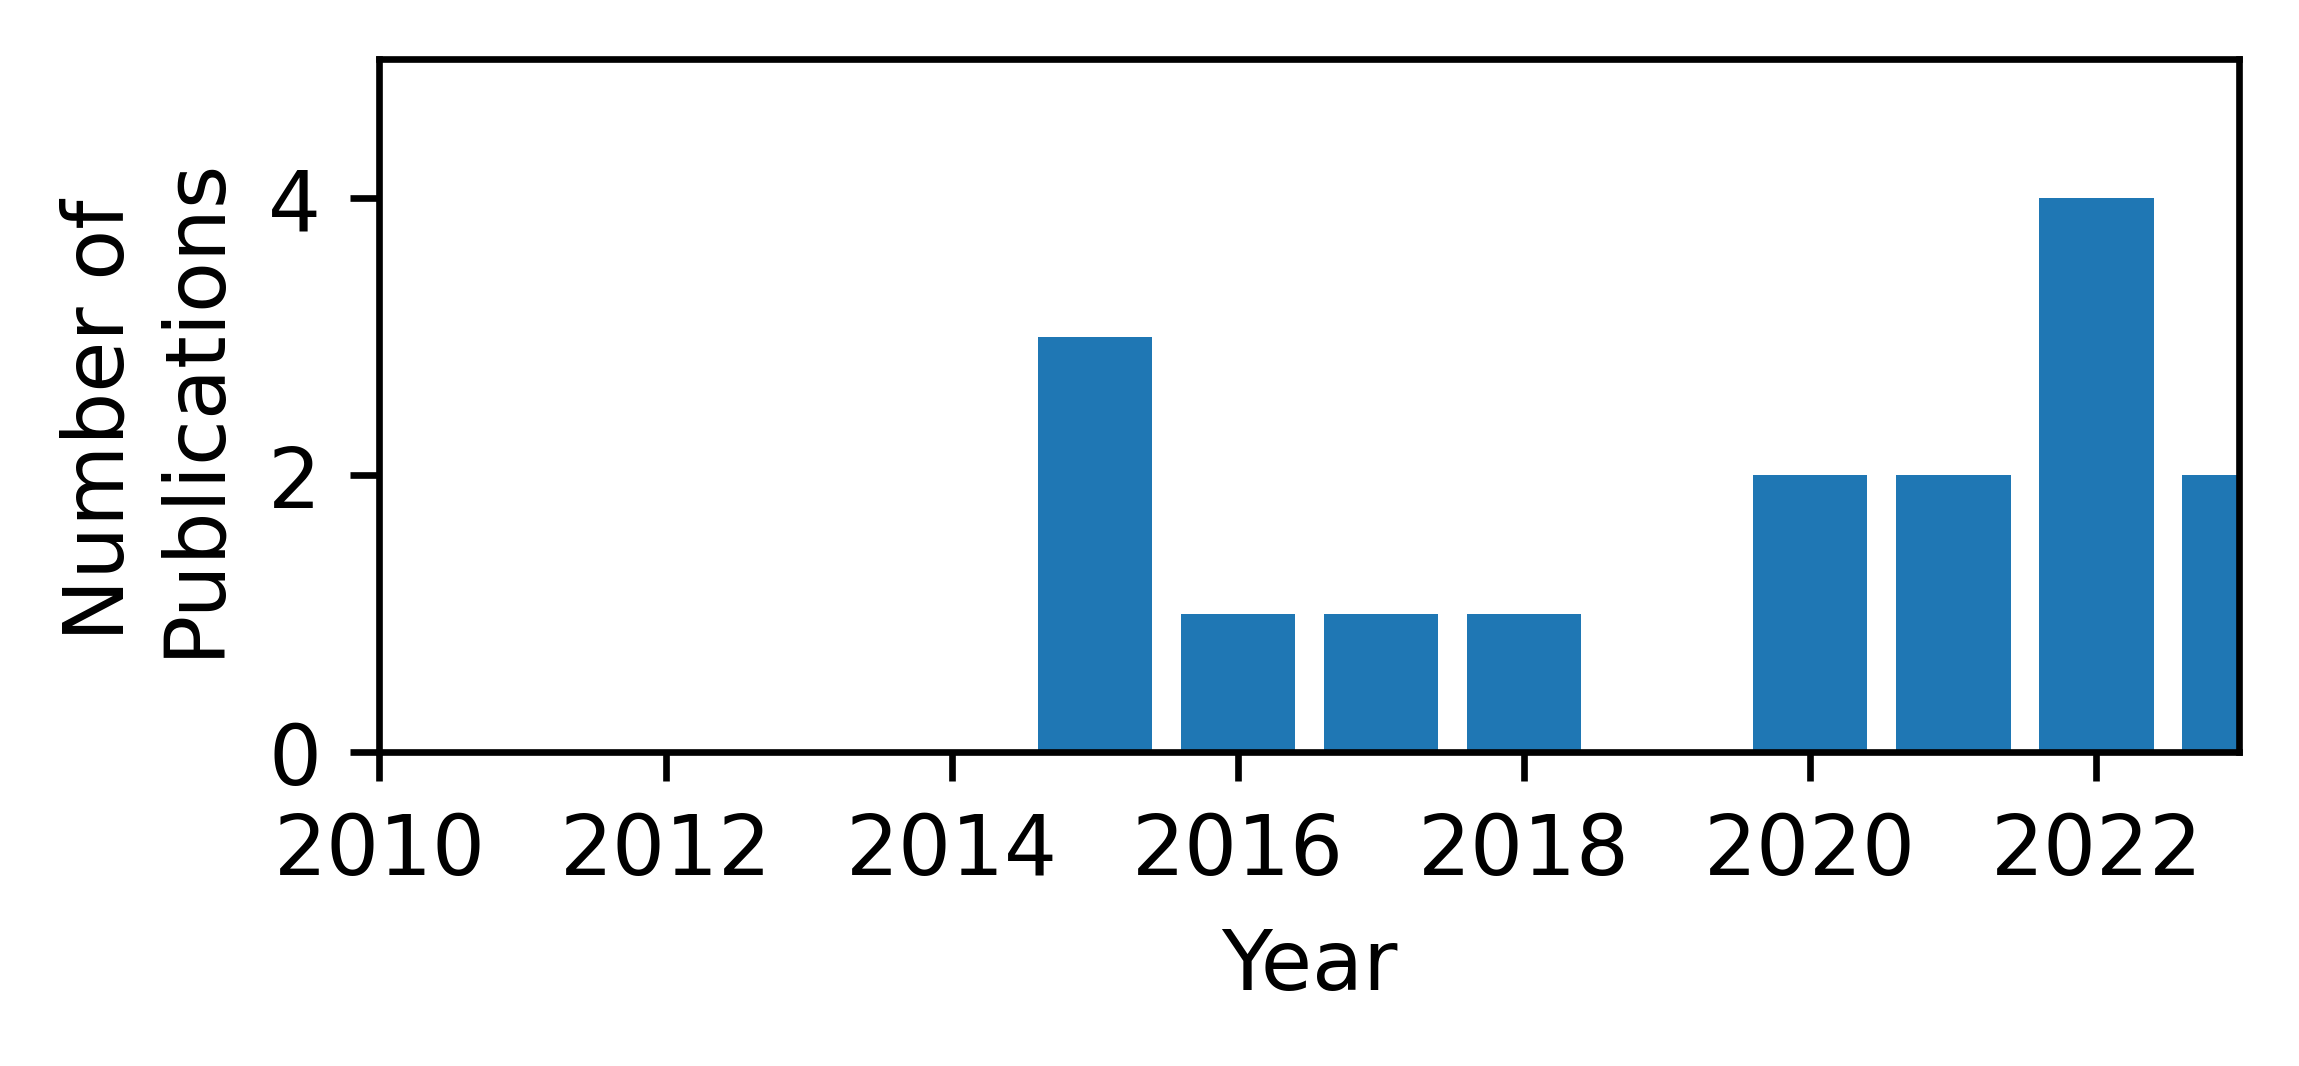

In [13]:
##import file with sample types for each year and overall
pub_year = pd.read_excel('Tables/AfricaOnly/pubs_per_year_2024.xlsx')

fig, ax1 = plt.subplots(figsize=(4,1.5), dpi = 600)
plt.bar(pub_year['Year'], pub_year['Num_pubs'])

#plt.plot(pub_year['YEAR'],pub_year['NUMBER OF PUBLICATIONS'])
ax1.set_xlim([2010, 2023])
ax1.set_ylim([0, 5])
plt.xlabel("Year")  # add X-axis label
plt.ylabel("Number of \nPublications")  # add Y-axis label

plt.savefig('Figures/AfricaOnly/PubsPerYear2024_Oct', dpi=600, bbox_inches='tight', transparent=True)


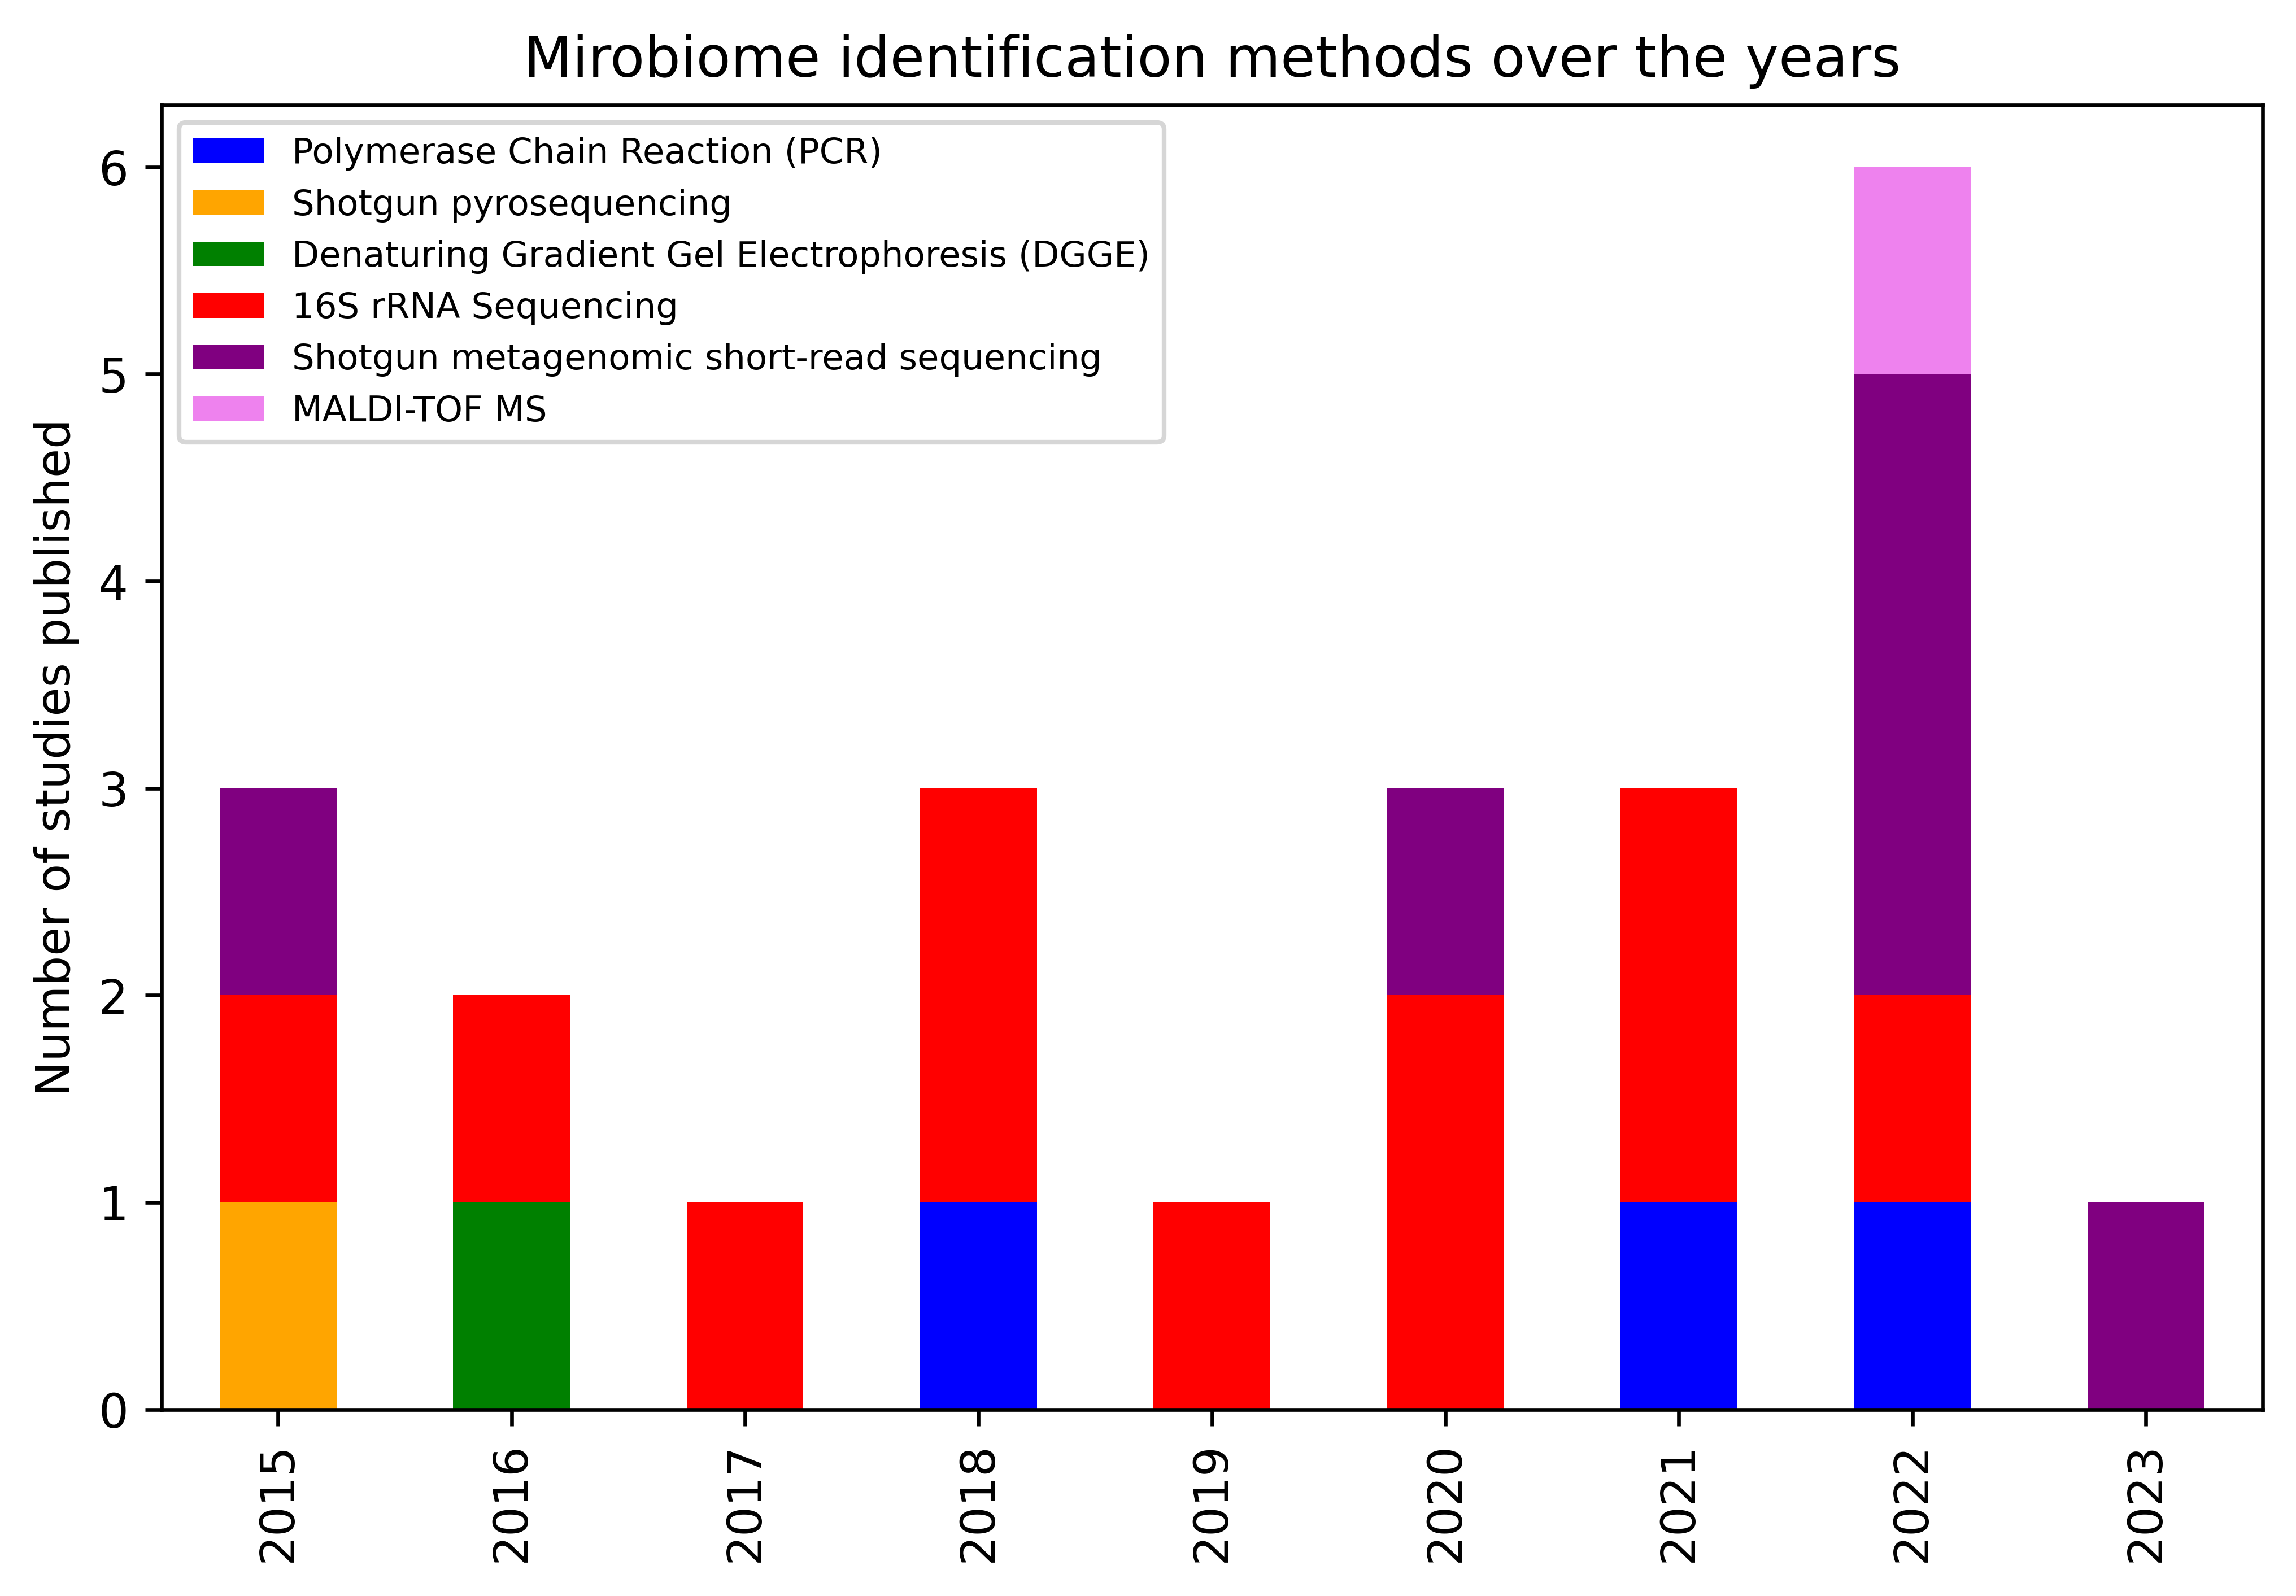

In [14]:
##import file with methodologies for each year and overall
methods = pd.read_csv('Tables/AfricaOnly/seq_methods2024.csv')
#df = df.fillna(0)
#df.replace(0, np.nan, inplace=True)
#del methods['Unnamed: 15']

methods.head()

methods.rename({"Method":"YEAR"}, axis=1, inplace=True)
methods = methods.set_index('YEAR')
##transpose dataframe before barplot
methodsT = methods.T
#methodsT.columns = methodsT.iloc 
#methodsT = methods [1:]

methodsT.head()
methodsT.dtypes

fig, ax = plt.subplots( figsize=(8,5), dpi = 600)
colors = ('blue', 'orange', 'green', 'red', 'purple', 'violet', 'cyan')
methodsT.plot(ax=ax, kind='bar', stacked=True, color = colors)
plt.legend(loc='upper left', fontsize=7.5)
plt.title('Mirobiome identification methods over the years', color='black')
plt.ylabel('Number of studies published', color='black')
#plt.xlabel('Years', color='black')
plt.savefig('Figures/AfricaOnly/seq-methods-2024_Oct', dpi=600, bbox_inches='tight', transparent=True)

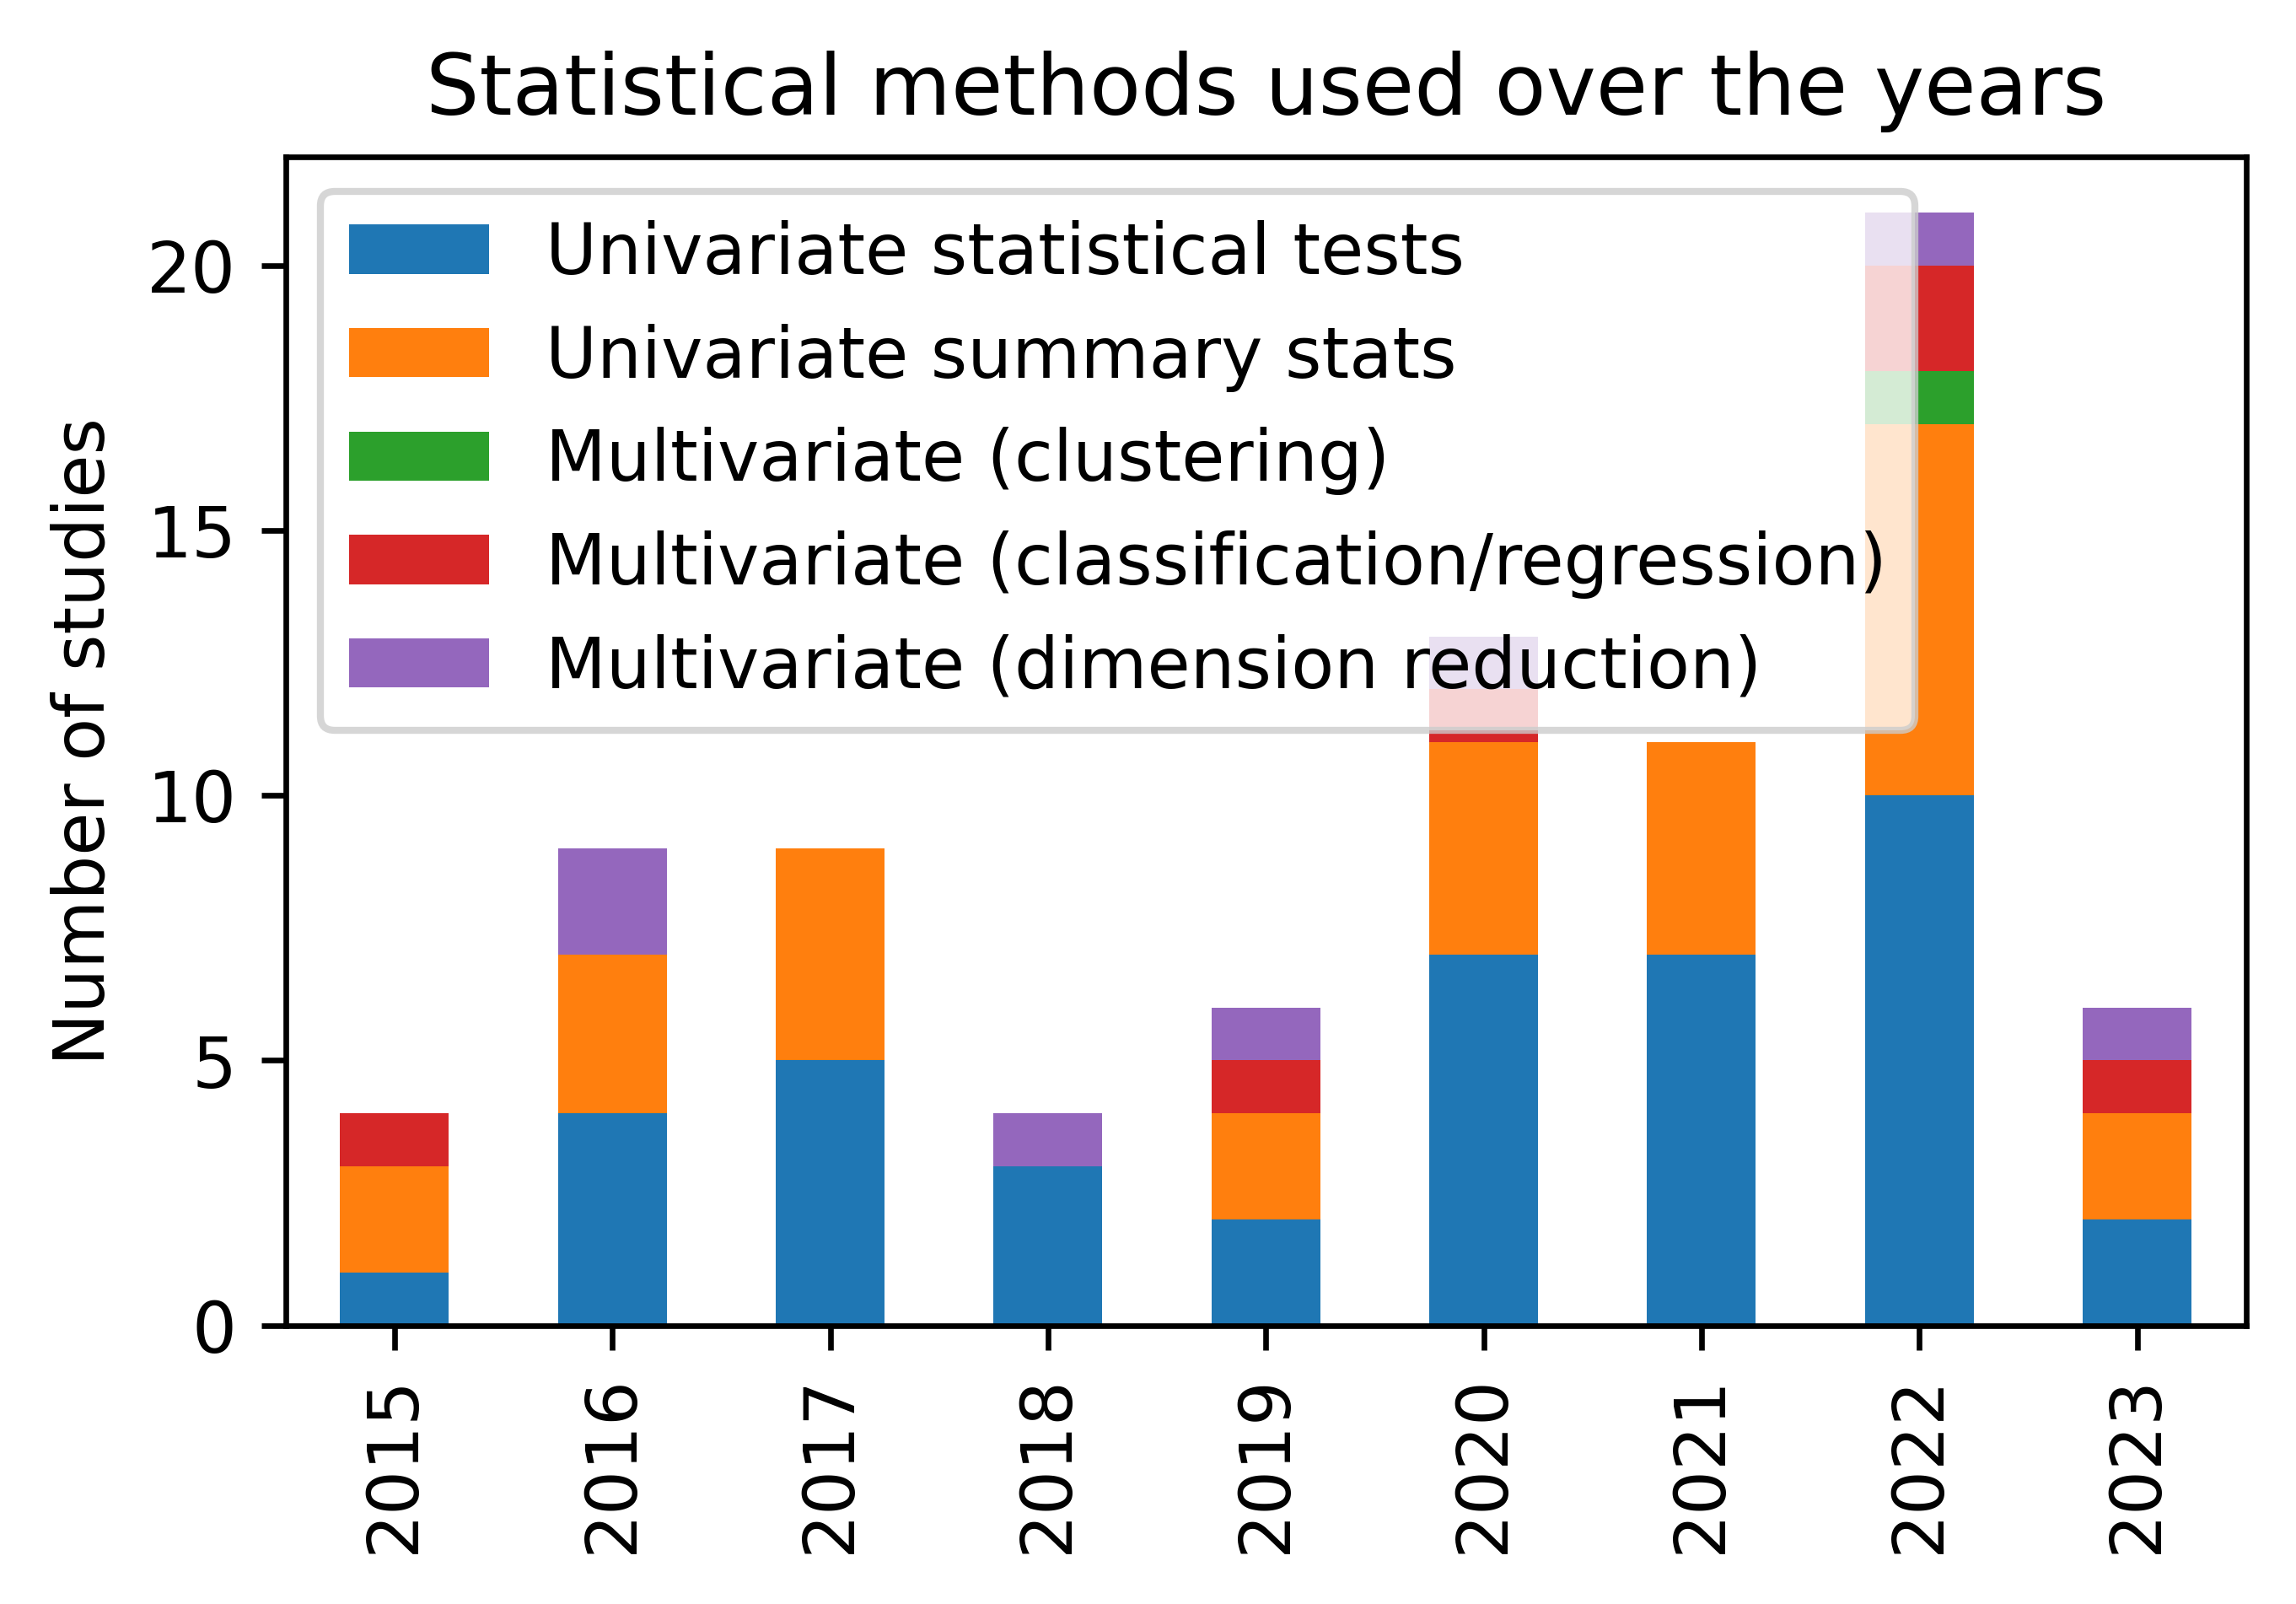

In [15]:
##import file with stat methods for each year and overall
stat_method = pd.read_csv('Tables/AfricaOnly/stat_methods2024.csv')
stat_method = stat_method.set_index('Publication Year')
#df = df.fillna(0)
#df.replace(0, np.nan, inplace=True)
stat_method.head()

fig, ax = plt.subplots( figsize=(5,3), dpi = 600)
#colors = ('red', 'purple', 'violet', 'cyan', )
stat_method.plot(ax=ax, kind='bar', stacked=True)#, color = colors)
plt.legend(loc='upper left')
plt.title('Statistical methods used over the years', color='black')
plt.ylabel('Number of studies', color='black')
plt.xlabel('')
#plt.xlabel('Years', color='black')
plt.savefig('Figures/AfricaOnly/stat methods over the years-2024_Oct', dpi=600, bbox_inches='tight', transparent=True)

# Combine all images for figure 2

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from io import BytesIO

fig, axs = plt.subplots(figsize=(17,12), dpi = 600)
fig.tight_layout()

gs = fig.add_gridspec(3,4, figure = fig)
axs.axis('off')
axs.set_aspect('auto')

axs.set_facecolor("white")

#Publications per year
ax1 = fig.add_subplot(gs[0, 0])
plt.bar(pub_year['Year'], pub_year['Num_pubs'])
ax1.set_xlim([2010, 2023])
ax1.set_ylim([0, 6])
ax1.set_xlabel("Year")  # add X-axis label
ax1.set_ylabel("Number of \nPublications")  # add Y-axis label
ax1.set_title('A.', loc='left', fontstyle='oblique', fontsize='medium')
#ax1.axis('off')

#Sample Type
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('B.', loc='left', fontstyle='oblique', fontsize='medium')
plt.pie(sampletype['Count'], labels =None, autopct=absolute_value, radius=1.0, wedgeprops=dict(width=0.5, edgecolor='w'), explode=[0,0.1,0.1])
plt.legend(labels = sampletype['Sample Type'], loc="upper right")
ax2.axis('off')

#African Map
vmin = 0
vmax = 5
ax3 = fig.add_subplot(gs[0:2,2:4])
ax3.set_title('C.                                                             All microbiome studies', 
              loc='left', fontstyle='oblique', fontsize='medium')
p0 = Africa_meta.plot(ax=ax3, column='studies', cmap='OrRd',
                 vmin=vmin, vmax=vmax, edgecolor=u'black',
                 missing_kwds= dict(color = "white"))
sm = plt.cm.ScalarMappable(cmap= 'OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([])
# add the colorbar to the figure
axins = inset_axes(ax3,
                   width="3%",  
                   height="23%",
                   loc='upper right',
                   borderpad=3)
# Create an inset axis in the bottom right corner
cbar = fig.colorbar(sm,ticks=[0,2,4,6], 
                    aspect=16, 
                    orientation='vertical',
                    cax=axins)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_ylabel('Number of microbiome studies',fontsize=8)
ax3.axis('off')

## Disease plots
vmin = 0
vmax = 5
#SAM
ax4 = fig.add_subplot(gs[1, 0:1])
ax4.axis('off')
gs00 = gs[1, 0:2].subgridspec(1, 2)
ax41 = fig.add_subplot(gs00[0, 0])
ax42 = fig.add_subplot(gs00[0, 1])

ax4.set_title('D.', loc='left', fontstyle='oblique', fontsize='medium')
ax41.set_title('Severe Acute Malnutrition (SAM)',fontsize=10)
p1 = Africa_meta.plot(ax=ax41, column='SAM', cmap='OrRd',  vmin=vmin, vmax=vmax,edgecolor=u'black',
                 missing_kwds= dict(color = "white"))

ax42.set_title('Stunting',fontsize=10)
p4 = Africa_meta.plot(ax=ax42, column='Stunting', cmap='OrRd',  vmin=vmin, vmax=vmax,edgecolor=u'black',
                      missing_kwds= dict(color = "white"))

ax41.axis('off')
ax42.axis('off')

#Seq Methods
ax6 = fig.add_subplot(gs[2:3, 0:2])
colors = ('blue', 'orange', 'green', 'red', 'purple', 'violet', 'cyan')
methodsT.plot(ax=ax6, kind='bar', stacked=True, color = colors)
plt.legend(loc='upper left', fontsize=8)
ax6.set_title('E.', loc='left', fontstyle='oblique', fontsize='medium')
ax6.set_ylabel('Number of studies', color='black')
#ax6.axis('off')

#Stat Method
ax7 = fig.add_subplot(gs[2:3, 2:4])
stat_method.plot(ax=ax7, kind='bar', stacked=True)#, color = colors)
plt.legend(loc='upper left')
ax7.set_title('F.', loc='left', fontstyle='oblique', fontsize='medium')
ax7.set_ylabel('Number of studies', color='black')
ax7.set_xlabel('')
#ax7.axis('off')

# save figure
# (1) save the image in memory in PNG format
png1 = BytesIO()
fig.savefig(png1, format='png', bbox_inches='tight', transparent=False, facecolor= 'white')

# (2) load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
png2.save('Figures/AfricaOnly/Fig22_Oct.tiff')
png1.close()
#plt.savefig('Figures/Python/Figure2_final2.png', bbox_inches='tight', transparent=False, facecolor= 'white')